In [1]:
import numpy as np
import torch
import torch.fft

from matplotlib import pyplot as plt

from fit.transformers.PositionalEncoding2D import PositionalEncoding2D

from fit.utils.tomo_utils import get_proj_coords_pol, get_proj_coords_cart, get_img_coords_pol, get_img_coords_cart

In [2]:
angles = np.linspace(0, 180, 11)
det_len = 7

img_shape = 7

In [3]:
def cart2pol(x, y):
    rho = torch.sqrt(x**2 + y**2)
    phi = torch.atan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * torch.cos(phi)
    y = rho * torch.sin(phi)
    return(x, y)

In [4]:
pr, pphi, pflatten = get_proj_coords_pol(np.deg2rad(angles), det_len)
ir, iphi, iflatten, iorder = get_img_coords_pol(img_shape, det_len)

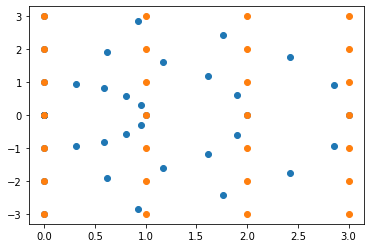

In [5]:
plt.scatter(*pol2cart(pr, pphi))
plt.scatter(*pol2cart(ir, iphi))

In [6]:
pos_enc_proj_pol = PositionalEncoding2D(64, pr, pphi, pflatten)

In [7]:
pos_enc_proj_img = PositionalEncoding2D(64, ir, iphi, iflatten)

In [8]:
pe = pos_enc_proj_img.pe[0,:,3]

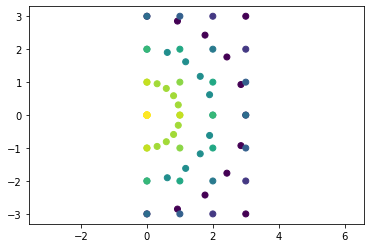

In [9]:
s = 3
plt.scatter(*pol2cart(pr[pflatten], pphi[pflatten]), c=pos_enc_proj_pol.pe[0,:,s])
plt.scatter(*pol2cart(ir[iflatten], iphi[iflatten]), c=pos_enc_proj_img.pe[0,:,s])
plt.axis('equal');